## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

### Reading Data by using pandas

In [2]:
df=pd.read_csv("/kaggle/input/market-dataset/supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Reading first 5 rows

In [53]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#  Data Cleaning

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [55]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [56]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

### Checking null values

In [57]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [58]:
df.isnull().sum()/len(df)*100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

### Counting Duplicate Rows in a DataFrame 

In [59]:
df.duplicated().sum()

0

# Exploring the data

### Checking the Data Type of the Date Column

In [60]:
df["Date"].dtype

dtype('O')

### Checking the Data Type of the Date Column

In [61]:
type(df["Date"])

pandas.core.series.Series

### Converting Date Column to Datetime Format

In [62]:
df['Date']=pd.to_datetime(df['Date'])

### Get Info For The Date Column

In [63]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


### Extracting Day, Month, and Year from a Datetime Column in a DataFrame 

In [64]:
df["Days"]=(df["Date"]).dt.day
df["Month"]=(df["Date"]).dt.month
df["Year"]=(df["Date"]).dt.year
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2,2019


### Counting the Frequency of Years and Months in a DataFrame

In [65]:
year_count=df['Year'].value_counts()
month_count=df['Month'].value_counts()
print(year_count)
print(month_count)

Year
2019    1000
Name: count, dtype: int64
Month
1    352
3    345
2    303
Name: count, dtype: int64


### Setting the DataFrame Index to the Date Column 

In [66]:
df.set_index(df['Date'],inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year
Date,,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,2019


###  Dropping the Date Column from the DataFrame 

In [67]:
df.drop(columns='Date',inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year
Date,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,2019


### Converting a Time Column to Datetime Format and Extracting Hour

In [68]:
df['Time'] = pd.to_datetime(df['Time'])
df["Hour"]=(df['Time']).dt.hour
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year,Hour
Date,,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2024-07-21 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2024-07-21 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2024-07-21 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2024-07-21 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2024-07-21 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2024-07-21 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019,13
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2024-07-21 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019,17
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2024-07-21 13:22:00,Cash,31.84,4.761905,1.5920,7.7,9,2,2019,13


### Counting the Number of Unique Hours in a DataFrame

In [69]:
df['Hour'].nunique()

11

### Retrieving Unique Values from the Hour Column in a DataFrame

In [70]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

### Creating and Plotting a Crosstab of Product Lines and Months

Month                    1   2   3
Product line                      
Electronic accessories  54  54  62
Fashion accessories     64  60  54
Food and beverages      56  62  56
Health and beauty       49  46  57
Home and lifestyle      59  38  63
Sports and travel       70  43  53


<Axes: xlabel='Product line'>

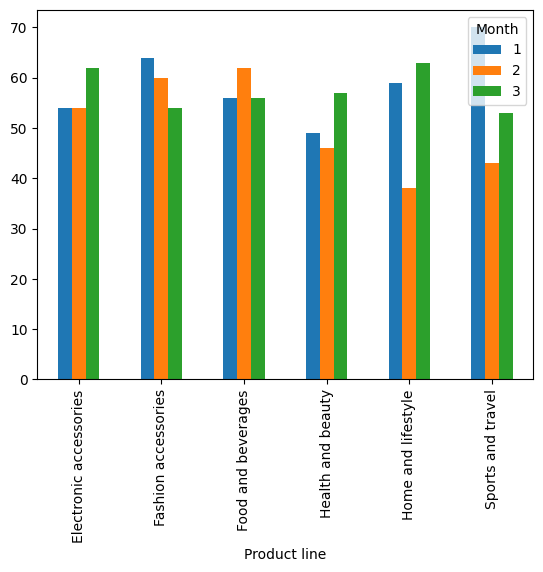

In [71]:
print(pd.crosstab(df['Product line'],df["Month"]))
pd.crosstab(df['Product line'],df["Month"]).plot(kind='bar')

### Counting the Frequency of Each Branch in a DataFrame

In [72]:
Branchs=df["Branch"].value_counts()
Branchs

Branch
A    340
B    332
C    328
Name: count, dtype: int64

### Counting the Frequency of Gender in a DataFrame

In [73]:
Gender=df["Gender"].value_counts()
Gender

Gender
Female    501
Male      499
Name: count, dtype: int64

### Counting the Frequency of Each City in a DataFrame

In [74]:
Cities=df["City"].value_counts()
Cities

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

### Counting the Frequency of Each Customer Type in a DataFrame

In [75]:
Customer_Types=df["Customer type"].value_counts()
Customer_Types

Customer type
Member    501
Normal    499
Name: count, dtype: int64

### Counting the Frequency of Payment Method in a DataFrame

In [76]:
Payment_Methods=df["Payment"].value_counts()
Payment_Methods

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

### Creating Pie Charts for Gender, Cities, Payment Methods, Customer Types, and Branches

Text(0.5, 1.0, 'Branchs')

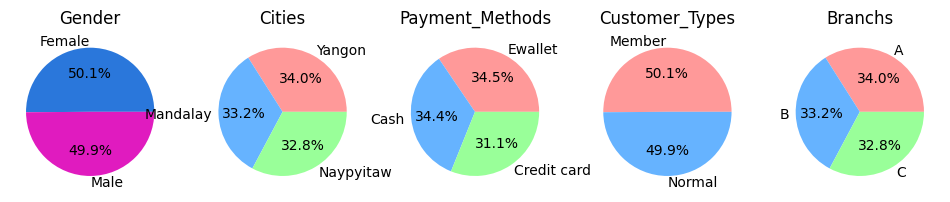

In [103]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(12,6))

ax1.pie(Gender,labels=Gender.index,autopct="%1.1f%%",colors=['#2a77db','#e01bbf'])
ax1.set_title("Gender")

ax2.pie(Cities,labels=Cities.index,autopct="%1.1f%%",colors = ['#ff9999','#66b3ff','#99ff99'])    
ax2.set_title("Cities")

ax3.pie(Payment_Methods,labels=Payment_Methods.index,autopct="%1.1f%%",colors = ['#ff9999','#66b3ff','#99ff99'])
ax3.set_title("Payment_Methods") 
    
ax4.pie(Customer_Types,labels=Customer_Types.index,autopct="%1.1f%%",colors = ['#ff9999','#66b3ff'])      
ax4.set_title("Customer_Types")

ax5.pie(Branchs,labels=Branchs.index,autopct="%1.1f%%",colors = ['#ff9999','#66b3ff','#99ff99'])      
ax5.set_title("Branchs")

### Counting and Plotting Product Line Frequencies as a Bar Chart 

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


<Axes: xlabel='Product line'>

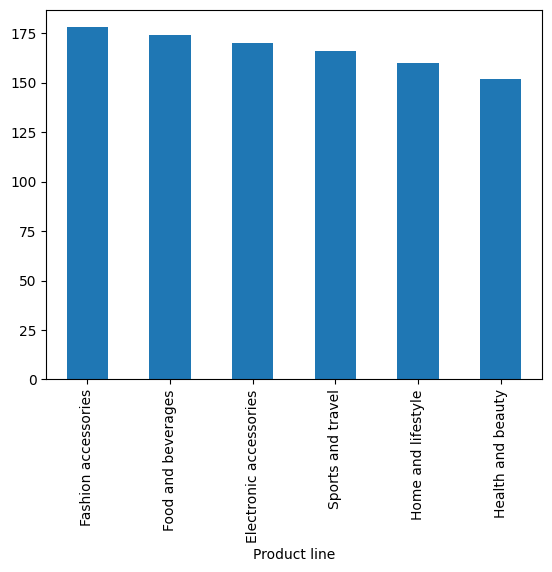

In [78]:
Product_line=df["Product line"].value_counts()
print(Product_line)
Product_line.plot(kind="bar")

### Counting the Frequency of Each Quantity in the DataFrame

In [79]:
df["Quantity"].value_counts()

Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

### Creating a Crosstab of Gender and Product Line

In [80]:
pd.crosstab(df["Gender"],df["Product line"])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


### Visualizing the Crosstab of Gender and Product Line as a Bar Chart

<Axes: xlabel='Gender'>

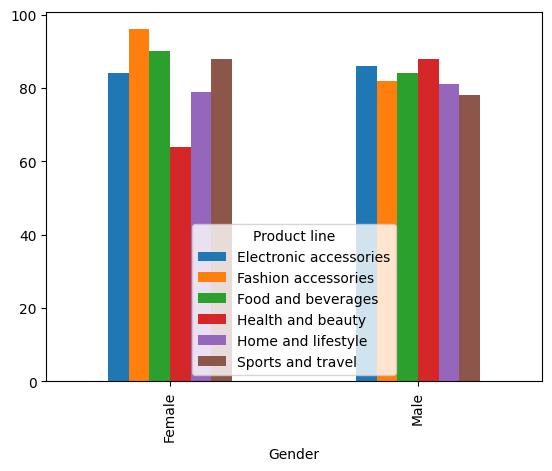

In [81]:
pd.crosstab(df["Gender"],df["Product line"]).plot(kind="bar")

### Creating a Crosstab of Branch and City

In [82]:
pd.crosstab(df['Branch'],df["City"])

City,Mandalay,Naypyitaw,Yangon
Branch,,,
A,0,0,340
B,332,0,0
C,0,328,0


### Branch vs Product Line Sales Distribution

In [83]:
pd.crosstab(df['Branch'],df["Product line"])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


### Distribution of Product Lines Across Branches

<Axes: xlabel='Branch'>

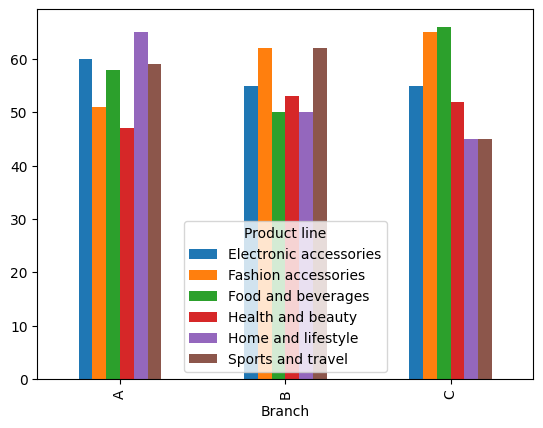

In [84]:
pd.crosstab(df['Branch'],df["Product line"]).plot(kind="bar")

### Maximum Values for Branch, City, Payment Method, and Total Sales

In [85]:
df[["Branch","City","Payment","Total"]].max()

Branch           C
City        Yangon
Payment    Ewallet
Total      1042.65
dtype: object

### Total Gross Income by Branch

In [86]:
df.groupby("Branch")["gross income"].sum().to_frame()

,gross income
Branch,
A,5057.1605
B,5057.0320
C,5265.1765


### Product Line with the Maximum Value

In [87]:
df["Product line"].max()

'Sports and travel'

### Maximum Values for City, Tax (5%), and Product Line

In [88]:
df[["City","Tax 5%","Product line"]].max()

City                       Yangon
Tax 5%                      49.65
Product line    Sports and travel
dtype: object

### Maximum Values by Customer Type

In [89]:
df.groupby('Customer type').max()

,Invoice ID,Branch,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year,Hour
Customer type,,,,,,,,,,,,,,,,,,,
Member,895-66-0685,C,Yangon,Male,Sports and travel,99.96,10,49.65,1042.65,2024-07-21 20:59:00,Ewallet,993.0,4.761905,49.65,10.0,31,3,2019,20
Normal,898-04-2717,C,Yangon,Male,Sports and travel,99.96,10,49.49,1039.29,2024-07-21 20:59:00,Ewallet,989.8,4.761905,49.49,10.0,31,3,2019,20


### Customer Type Distribution Across Branches

In [90]:
pd.crosstab(df["Customer type"],df["Branch"])

Branch,A,B,C
Customer type,,,
Member,167,165,169
Normal,173,167,159


### Comparison of Customer Types by Branch"

<Axes: ylabel='Customer type'>

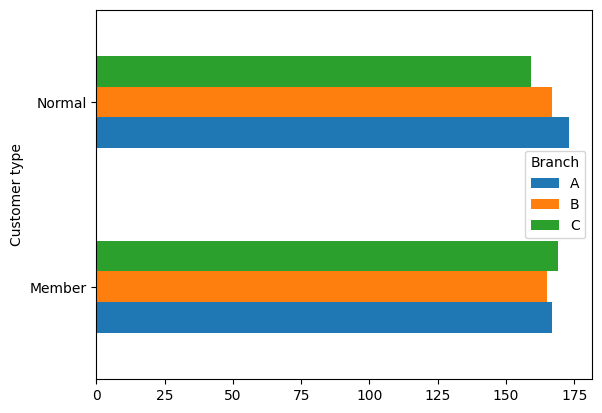

In [91]:
pd.crosstab(df["Customer type"],df["Branch"]).plot(kind="barh")

### Average Total Sales by Customer Type

In [92]:
total = df.groupby('Customer type')['Total'].mean()
total

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

###     For the bar plot on ax1: "Mean Total Amount by Customer Type
###     For the box plot on ax2: "Variation in Tax (5%) Across Customer Types



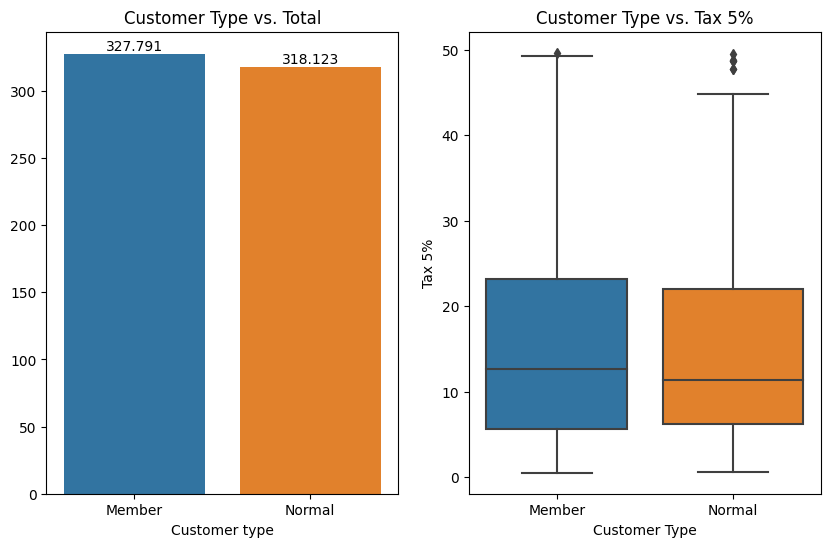

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x=total.index, y=total.values, ax=ax1)
ax1.set_title('Customer Type vs. Total')
bars = ax1.containers[0]
ax1.bar_label(bars)

sns.boxplot(x='Customer type', y='Tax 5%', data=df, ax=ax2)
ax2.set_xlabel('Customer Type')
ax2.set_ylabel('Tax 5%')
ax2.set_title('Customer Type vs. Tax 5%')

plt.show()


### Pairwise Relationships Among Variables in the Dataset

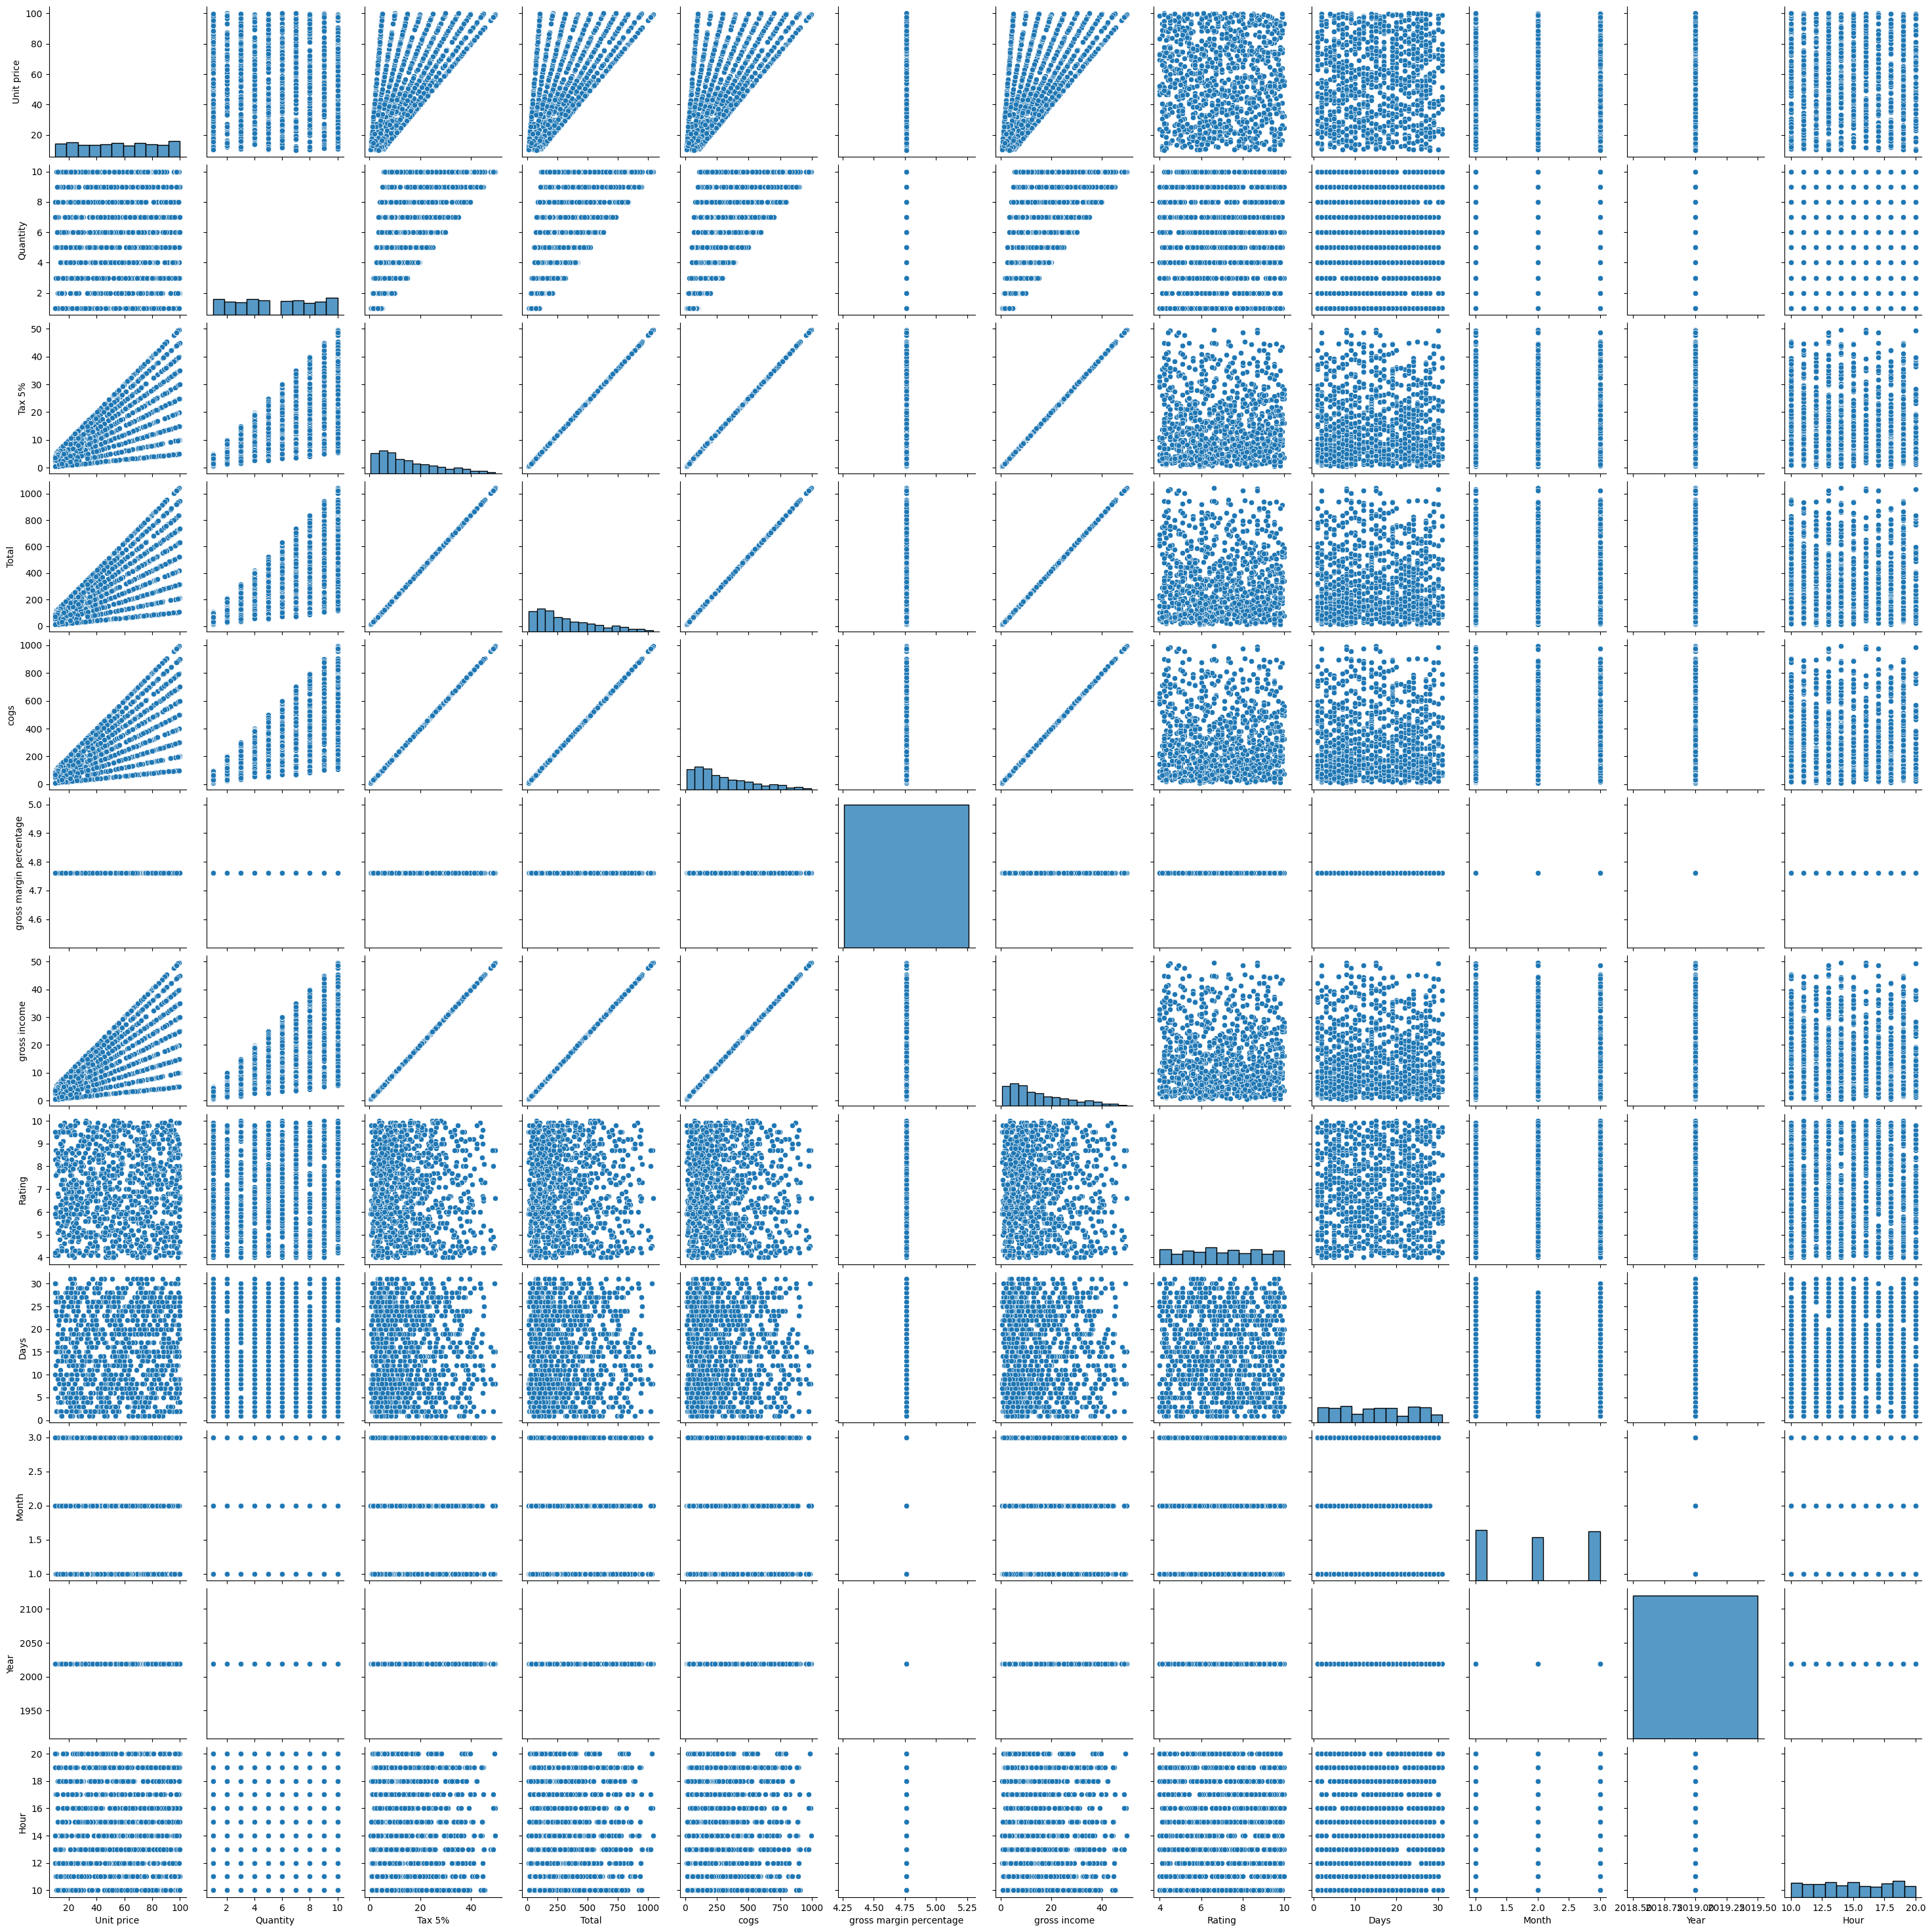

In [94]:
sns.pairplot(df)

### Distribution of Numerical Variables

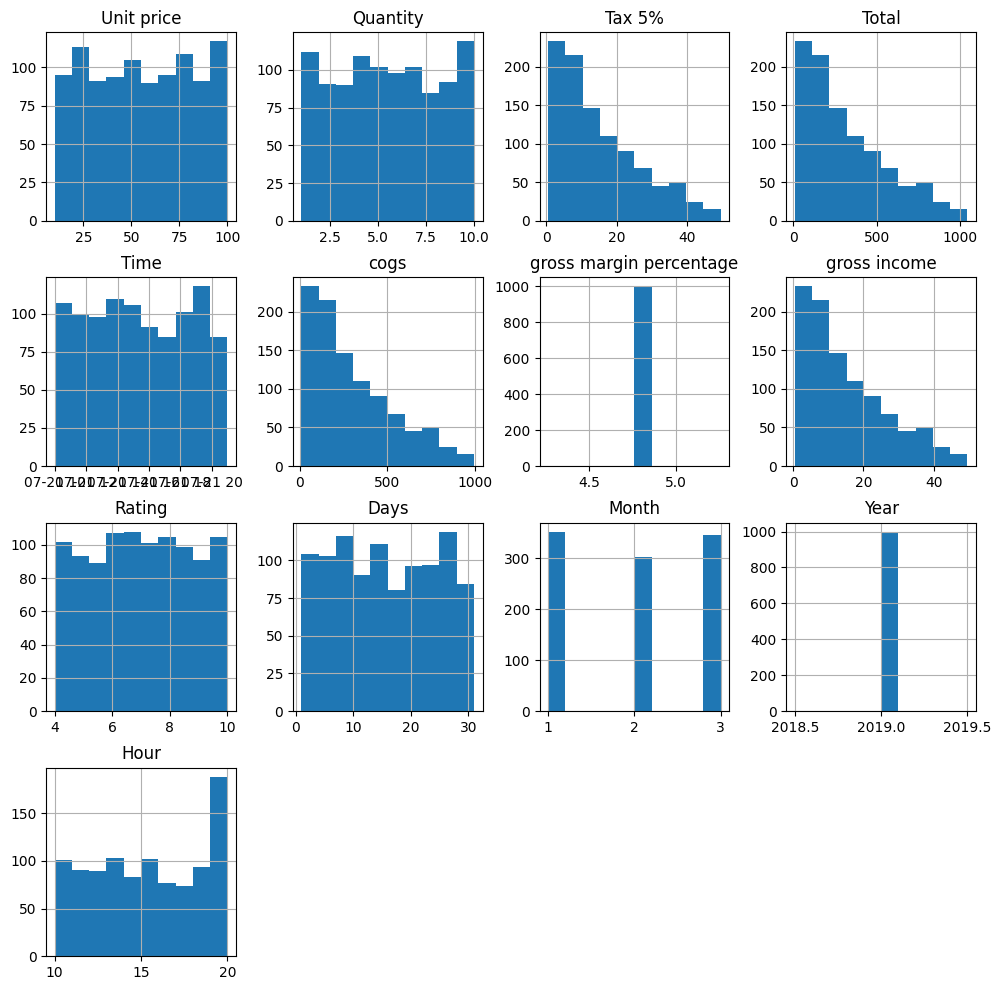

In [95]:
df.hist(figsize=(12,12))
plt.show()

### "Total Ratings by Product Line

In [96]:
df.groupby('Product line')['Rating'].sum()

Product line
Electronic accessories    1177.2
Fashion accessories       1251.2
Food and beverages        1237.7
Health and beauty         1064.5
Home and lifestyle        1094.0
Sports and travel         1148.1
Name: Rating, dtype: float64

### Sum of Ratings Across Product Lines

<Axes: xlabel='Product line'>

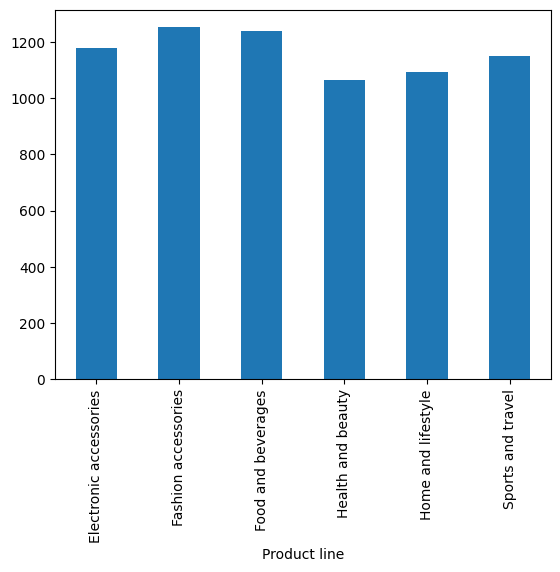

In [97]:
df.groupby('Product line')['Rating'].sum().plot(kind="bar")

### Total Gross Margin Percentage by Product Line

In [98]:
df.groupby('Product line')['gross margin percentage'].sum()

Product line
Electronic accessories    809.523810
Fashion accessories       847.619048
Food and beverages        828.571429
Health and beauty         723.809524
Home and lifestyle        761.904762
Sports and travel         790.476190
Name: gross margin percentage, dtype: float64

### Bar Plot of Total Gross Margin Percentage by Product Line

Text(0.5, 0, 'gross margin percentage')

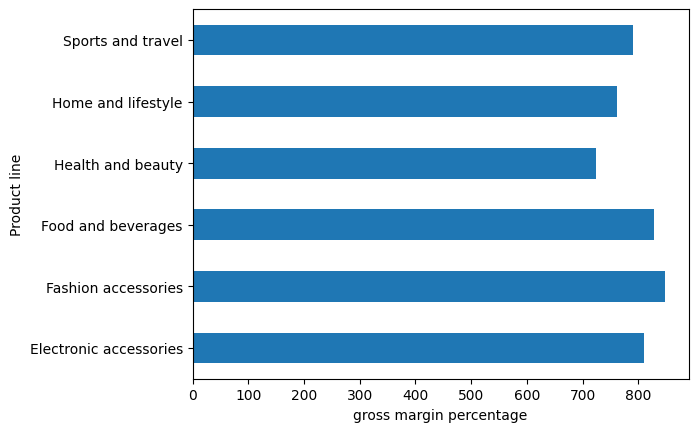

In [99]:
df.groupby('Product line')['gross margin percentage'].sum().plot(kind="barh")
plt.xlabel("gross margin percentage")

### Bar Plot of Total Tax (5%) by City

5265.1765


Text(0, 0.5, 'Tax 5%')

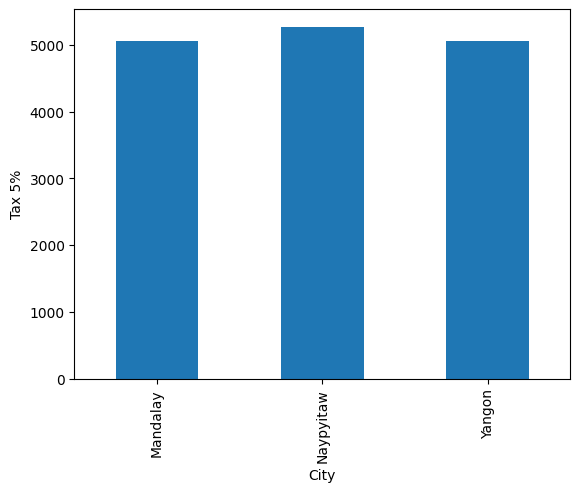

In [100]:
grouped=df.groupby("City")['Tax 5%'].sum()
print(grouped.max())
grouped.plot(kind='bar')
plt.ylabel("Tax 5%")

### Hourly Quantity Trends by Gender, Month, and Branch

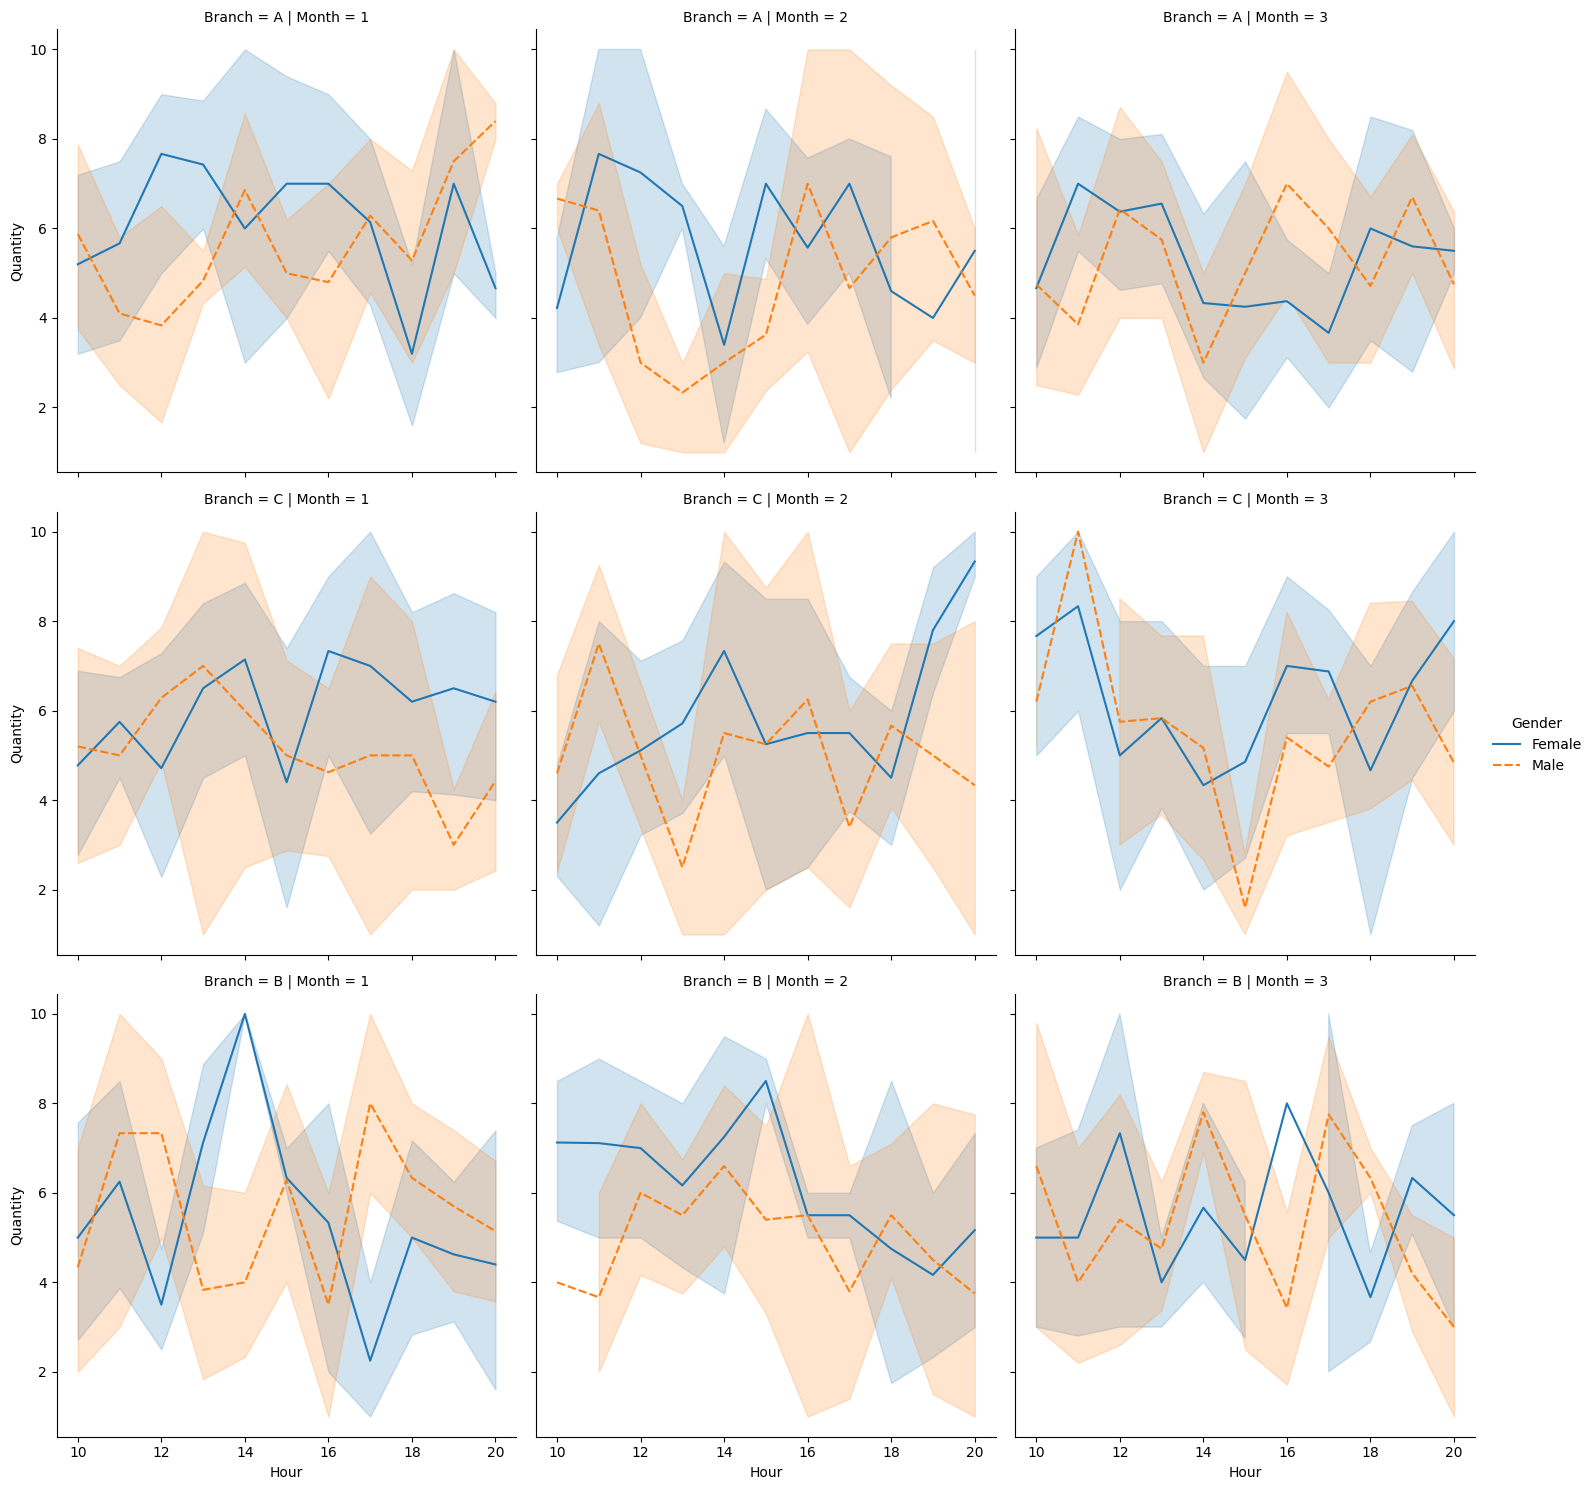

In [101]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)


### Hourly Total Sales Trends by Month and Branch

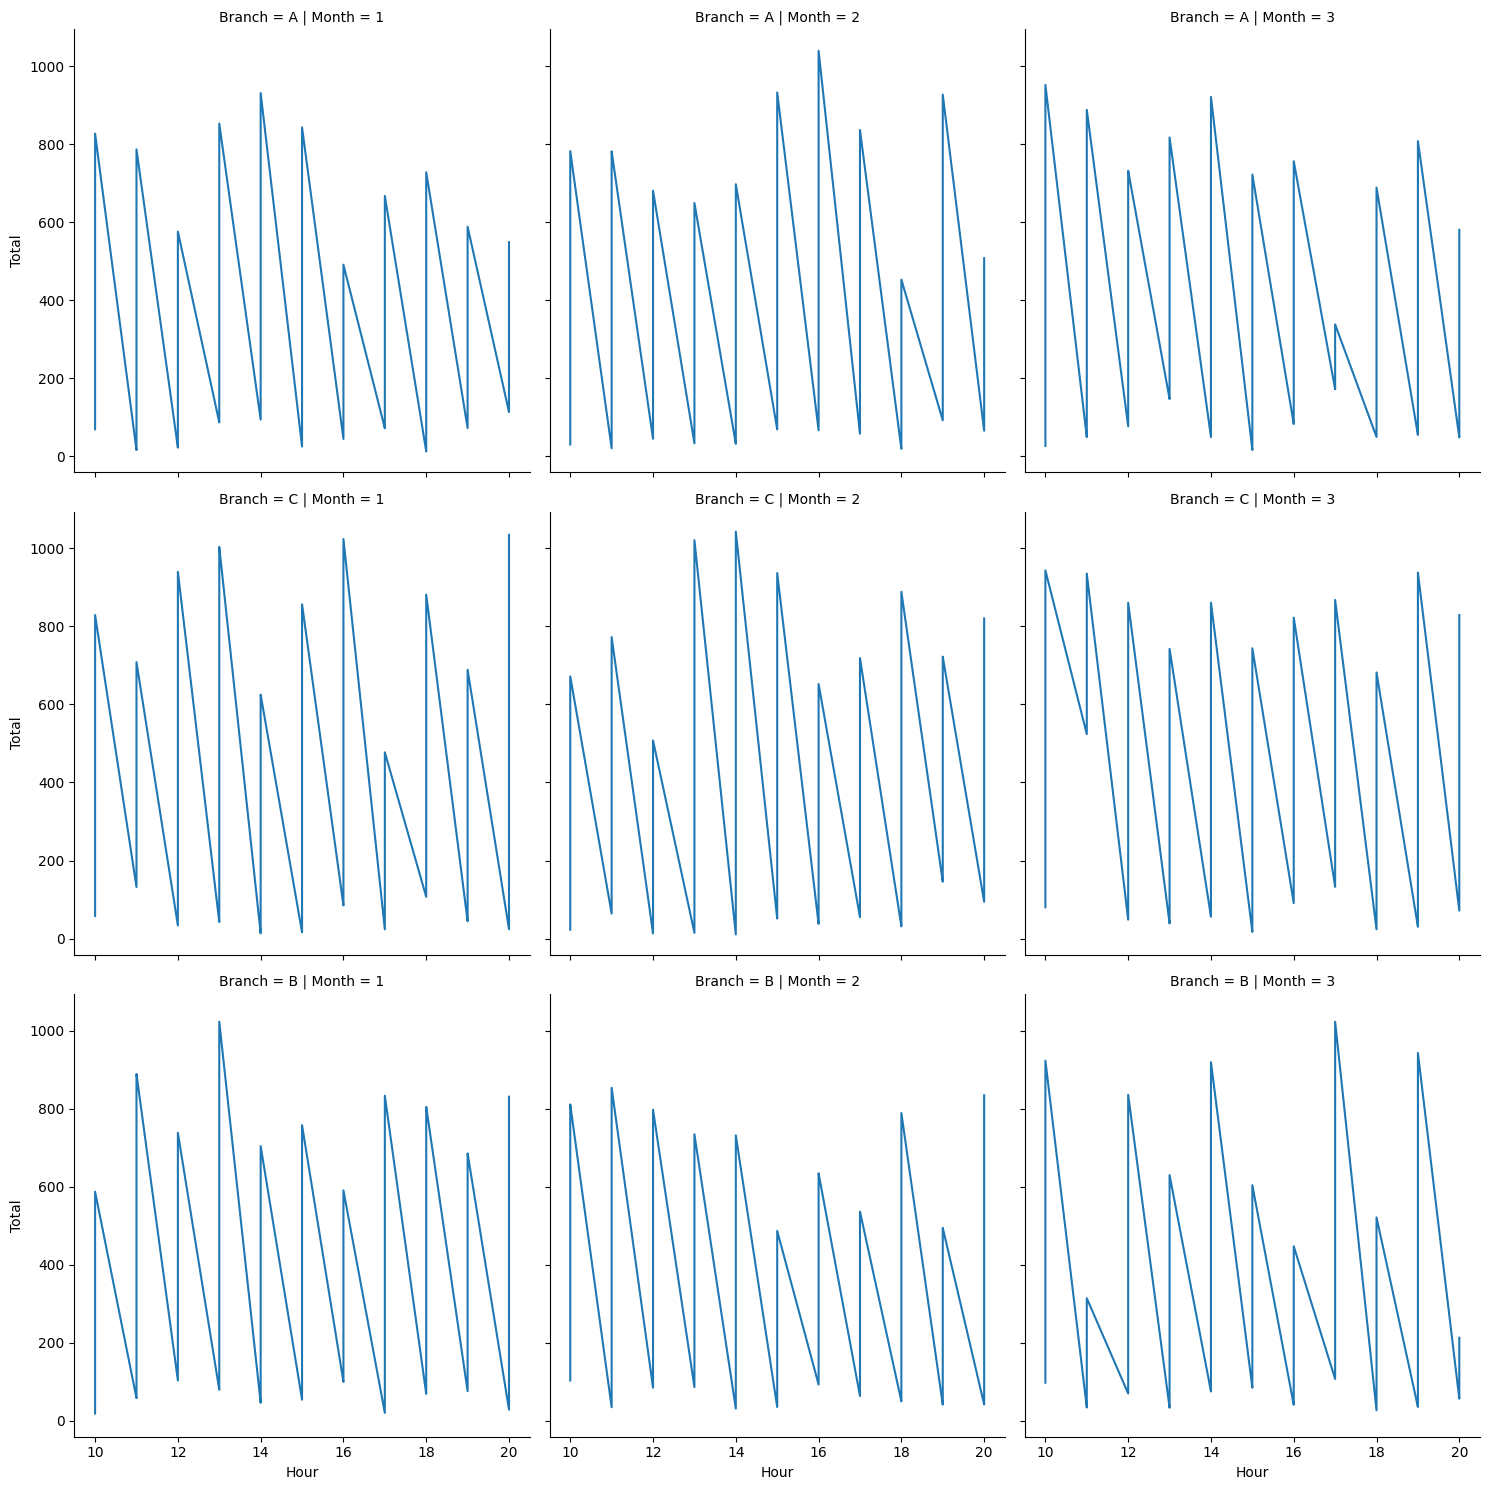

In [102]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'Month' , row= 'Branch', estimator = None, kind="line", data =df)

### Density Plot of Total Sales vs. Unit Price by Payment Method

<Axes: xlabel='Total', ylabel='Unit price'>

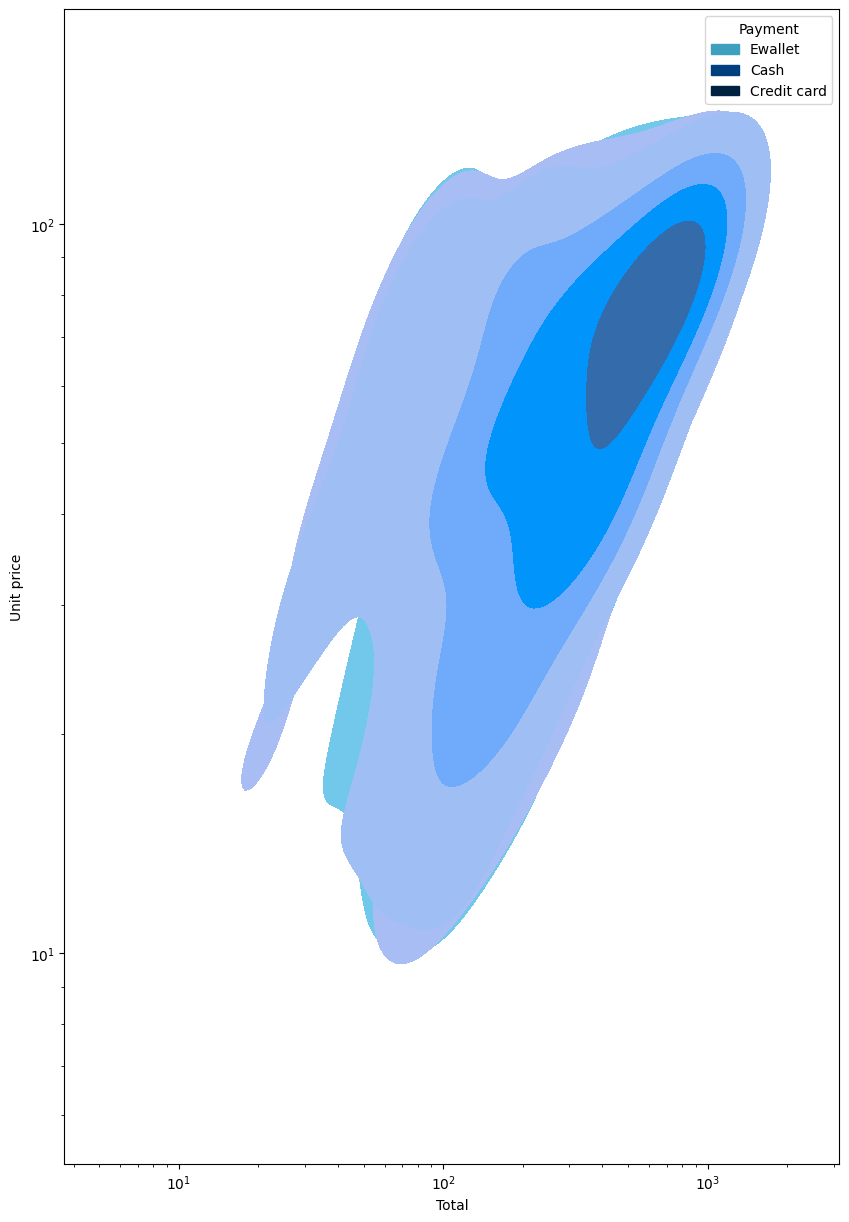

In [4]:
plt.figure(figsize=(10,15)) 
sns.kdeplot(data=df,x='Total', y='Unit price' ,hue='Payment', log_scale=True, fill=True,levels=5,thresh=0.1, palette ="ocean_r")